<a href="https://colab.research.google.com/github/Thofa90/Schema-and-AlgorithmLogic-for-NLP-Engine-SBERT-Regex-RuleBased-/blob/main/Embeddings_%26_semantic_similarity_(SBERT)_UserQueryUnderstnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Project Task

**Task: Draft Schema and Algorithm Logic for NLP Engine (SBERT-Based User Query Understanding for Housing Recommender System)**


# ✅ Goal:

**Extract structured parameters from user free-text housing search queries using SBERT embeddings and cosine similarity.**

# Objective:

**Create a detailed schema and flow diagram that clearly defines the algorithmic steps of our NLP engine, transforming user input strings into a structured set of parameters. This schema will serve as the foundation for splitting and assigning team tasks.**

## 🔁 Flow Overview
	1.	Preprocess the Query
	2.	SBERT Embedding Similarity Matching
	3.	Regex-based Value Extraction
	4.	Fallback Keyword Matching
	5.	Post-Processing & Normalization
	6.	Return Structured JSON Parameters


# 🔍 Introduction to SBERT:

**SBERT (Sentence-BERT)** is a modification of the BERT architecture designed to produce semantically meaningful sentence embeddings. It enables efficient comparison between sentence-level representations using cosine similarity.This module extracts structured parameters from natural language queries about housing preferences. It uses a combination of SBERT-based semantic matching, regex-based value extraction, and fallback logic with synonym expansion.

**✅ Core Principle:**
- Input text is encoded into dense vector embeddings.
- Similarity is measured using cosine distance.
- Ideal for semantic search, clustering, and textual entailment tasks.

**🎯 Real-world Use Cases:**
- Matching user queries with product descriptions
- Semantic FAQ retrieval
- Intent understanding in recommender systems (this project)

**👍 Pros:**
- High accuracy on semantic tasks
- Fast inference with small models (e.g., MiniLM)
- Free and local (no API required)

**👎 Cons:**
- Needs template tuning
- Limited multilingual support (depends on model)
- Struggles with very long text inputs


# **Step-by-step summary of the SBERT Query Parser**

## 1. Load Model and Prepare Templates
- Load a pre-trained SBERT model (`all-MiniLM-L6-v2`) for semantic similarity.
- Define `parameter_templates`: example phrases for each parameter (e.g., "balcony", "furnished").
- Define `MULTI_PARAMS`: parameters that can accept multiple values (like features or housing types).
- Embed all phrases from `parameter_templates` using SBERT.

## 2. Expand Query with Synonyms
Function: `expand_query_with_synonyms(query)`
- Append synonyms to the original query (e.g., if "dog" is mentioned, append "pets allowed").
- Helps boost matching accuracy during SBERT similarity comparison.

## 3. Query Preprocessing
- Normalize query (lowercase)
- Expand query with canonical synonyms → "pets allowed" added if "pet is allowed" is found

## 4. Extract Value from Query
Function: `extract_value(param, q)`
- Uses regex rules to extract numeric values for:
  - `price_constraint`: detect numbers like "800 euros"
  - `room_requirement`: detect "3 rooms"
  - `living_area_m2`: detect "50m2", with operator (>=, <=)
  - `floor_level`: map words like "top" or "3rd" to numbers

## 5. Detect Berlin District
Function: `detect_district(query)`
- Matches known Berlin district names in the query.

## 6. Main Logic: `extract_parameters(query)`
### ✅ Input:
- `query`: A user’s free-text housing request (e.g., “Looking for a flat in Mitte with balcony and rent under 1000”)
- `parameter_templates`: Dictionary mapping parameters to example phrases
- `canonical_map`: Maps all synonyms to canonical values
- `MULTI_PARAMS`: List of parameters allowed to have multiple values


### 🧩 Step-by-Step:

1. **Preprocess Query**
   - Lowercase the input
   - Optionally expand the query with synonyms (e.g., "metro" → "public transportation")

2. **SBERT Embedding & Matching**
   - Embed the user query with SBERT
   - Compute cosine similarity with all example phrases from `parameter_templates`
   - Filter phrases with similarity above a threshold (e.g., 0.15)

3. **Parameter Detection (via SBERT match)**
   - For each matched phrase:
     - Identify the target parameter (`price_constraint`, `feature_request`, etc.)
     - Use regex-based value extraction for numeric types (e.g., rent, floor, area)
     - Use normalized canonical phrase for others
     - Merge values if parameter already exists in `grouped`
     - Store new value if it's the first detection

4. **Fallback Keyword Matching**
   - For each parameter not already populated (unless it’s in `MULTI_PARAMS`):
     - Loop through example phrases
     - If all words of the example are in the query (order-independent):
       - Normalize using `canonical_map`
       - Add to `grouped`

5. **Postprocessing & Cleanup**
   - Normalize & deduplicate values across all `MULTI_PARAMS`
   - If "green" in `environment_preference`, remove "garden" from `feature_request`
   - Ensure all multi-value parameters are represented as lists
   - Add `district` via regex fallback if still missing
   - Remove any parameters with empty value lists


### 7. ✅ Output:
Returns a list of structured parameter objects:
```json
[
  {
    "priority": 1,
    "parameter": "housing_type",
    "value": ["flat", "apartment"],
    "operator": "=="
  },
  {
    "priority": 2,
    "parameter": "price_constraint",
    "value": 1000,
    "operator": "<="
  },
  ...
]

## **Logic for Algorithm Flowchart Diagram**

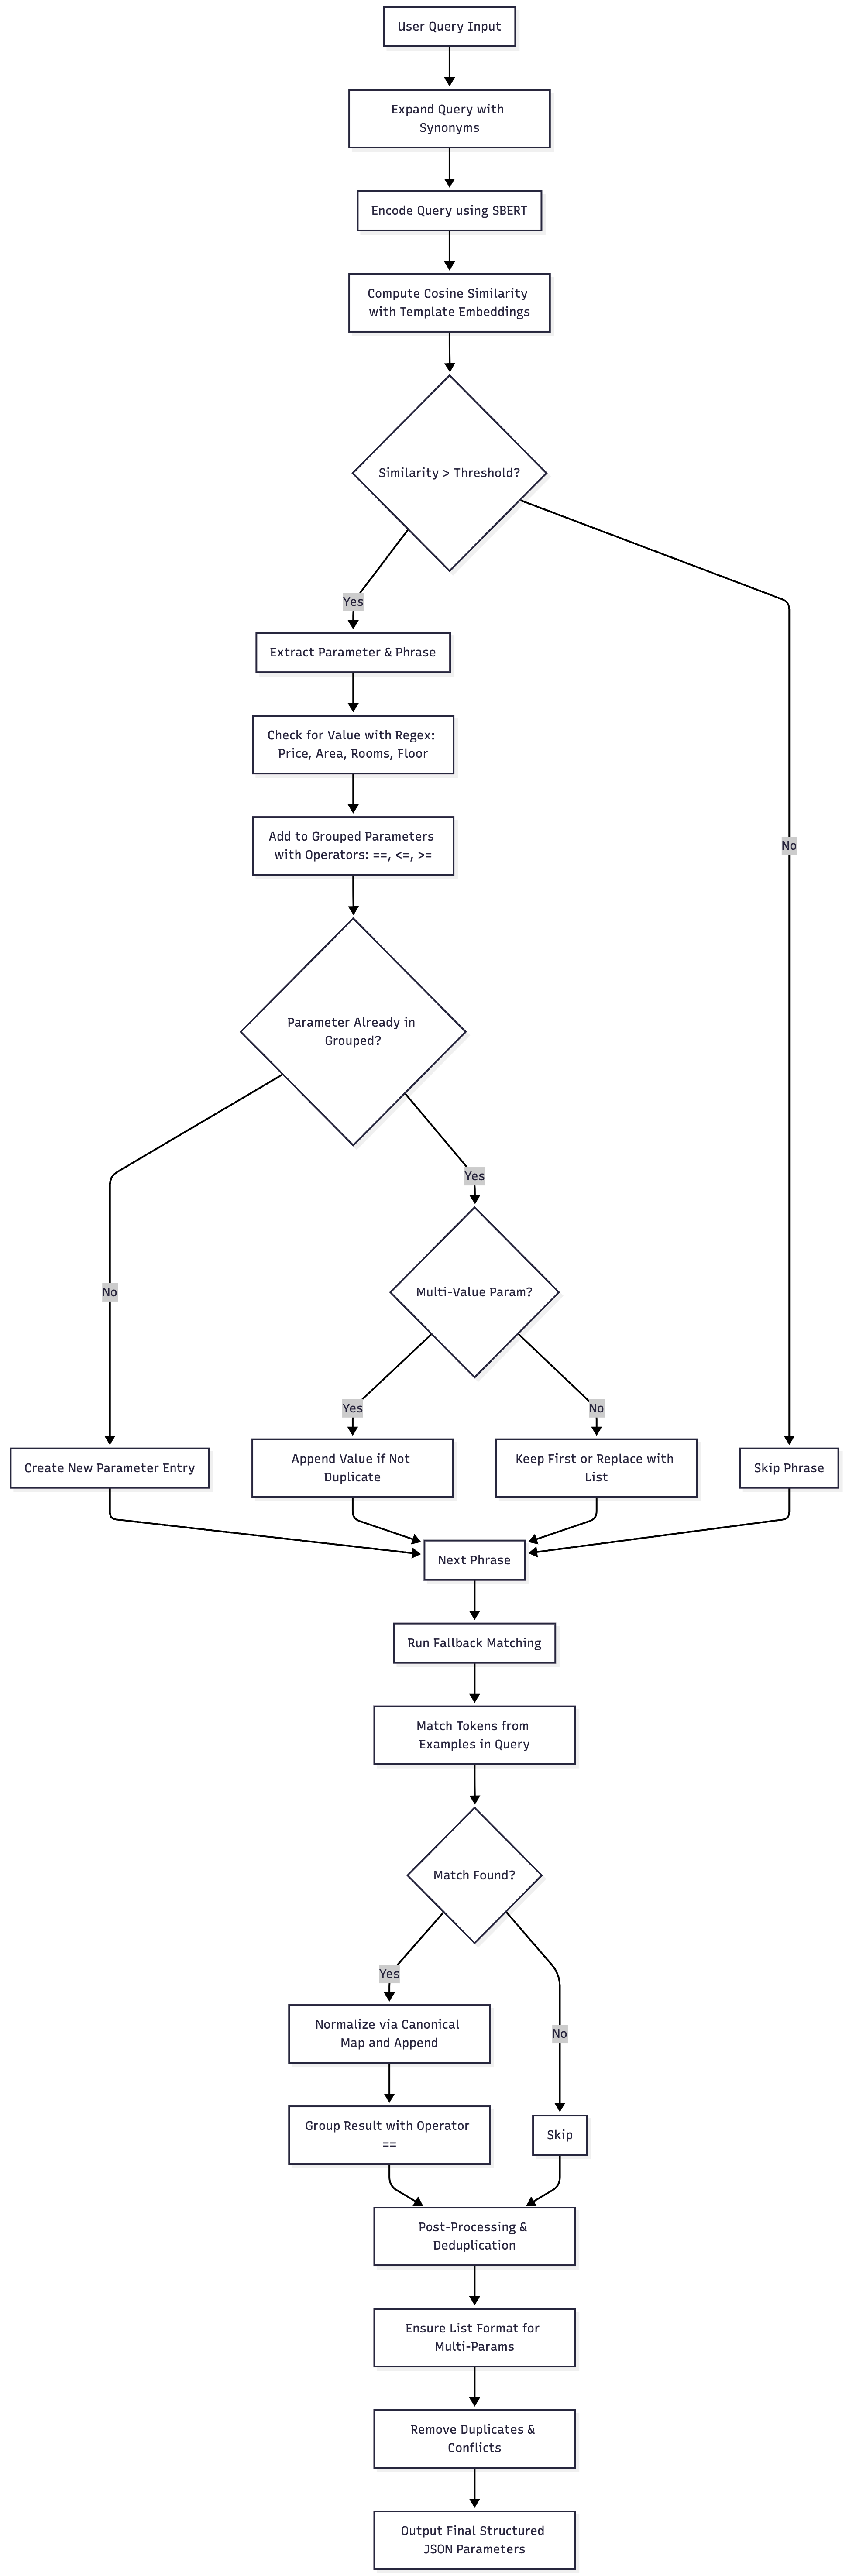



📌 **Explanation of Steps:**

| Step | Description |
|------|-------------|
| **User Query Input** | User types a natural-language housing query |
| **Expand Query with Synonyms** | Inject synonym equivalents to enrich matching |
| **SBERT Encoding** | Convert query to vector for semantic matching |
| **Cosine Similarity** | Measure similarity with example phrases |
| **Threshold Check** | Only consider phrases above similarity threshold |
| **Regex Value Extraction** | Extract numbers like rent or room count via regex |
| **Fallback Matching** | If SBERT fails, check via keyword/synonym matching |
| **Post-Processing** | Normalize, deduplicate, enforce list formatting |
| **Final Output** | Return cleaned structured JSON of extracted parameters |

## 🧠 Query Understanding Flowchart

✅ What This Shows:

	-	Top half: SBERT + regex logic for semantic similarity
	-	Bottom half: Fallback matching + cleanup
	-	End: Returns JSON with priority, parameter, value, operator

This mermaid diagram shows the internal logic of the SBERT-based query parsing pipeline:

```mermaid
flowchart TD
    A[User Query Input] --> B[Expand Query with Synonyms]
    B --> C[Encode Query using SBERT]
    C --> D[Compute Cosine Similarity with Template Embeddings]
    D --> E{Similarity > Threshold?}

    E -- Yes --> F[Extract Parameter & Phrase]
    F --> G[Check for Value with Regex (Price, Area, Rooms, Floor)]
    G --> H[Add to Grouped Parameters with Operator (==, <=, >=)]

    E -- No --> I[Skip Phrase]

    H --> J{Parameter Already in Grouped?}
    J -- No --> K[Create New Parameter Entry]
    J -- Yes --> L{Multi-Value Param?}
    L -- Yes --> M[Append Value if Not Duplicate]
    L -- No --> N[Keep First or Replace with List]

    K --> O[Next Phrase]
    M --> O
    N --> O
    I --> O

    O --> P[Run Fallback Matching]
    P --> Q[Match Tokens from Examples in Query]
    Q --> R{Match Found?}
    R -- Yes --> S[Normalize via Canonical Map and Append]
    S --> T[Group Result with Operator ==]
    R -- No --> U[Skip]

    T --> V[Post-Processing & Deduplication]
    U --> V

    V --> W[Ensure List Format for Multi-Params]
    W --> X[Remove Duplicates & Conflicts]
    X --> Y[Output Final Structured JSON Parameters]
    

# **Implementation of SBERT and Rule Based Model**

In [24]:
!pip install -U sentence-transformers

In [25]:
import re
from sentence_transformers import SentenceTransformer, util

# Load SBERT model for semantic similarity matching
model = SentenceTransformer("all-MiniLM-L6-v2")

# Parameter templates (Contains example phrases)
parameter_templates = {
    "price_constraint": ["rent under 1000", "maximum 1200 euros", "budget below 900"],
    "room_requirement": ["3-room apartment", "2 rooms apartment", "2 rooms flat", "single room","at least 2 bedrooms", "4-room flat", "2-room house","3 rooms apartment", "3 rooms flat", "3 bedrooms"],
    "furnishing": ["furnished apartment", "includes furniture", "with kitchen", "fully furnished", "furnished"],
    "feature_request": ["has balcony", "balcony", "garden", "lift", "garage", "parking space", "storage room", "backyard"],
    "Education":["school","university","childcare","daycare","near kindergartens","near colleges","near schools"],
    "environment_preference": ["quiet", "safe area","protection zone","regional statistics","safe district","green", "quiet neighborhood", "green surroundings", "peaceful neighborhood", "near forest", "near park"],
    "health_safety": ["near hospitals","near clinics","vet clinics","clinics","dental officies","near pharmacies","crime statistics","crime free"],
    "convenience_access": ["supermarkets", "grocery stores", "banks", "ATMs", "post office", "laundromats", "dry cleaners","shopping centers", "convenience stores", "bakeries",
    "cafes", "pools","swimming pools","restaurants", "libraries", "gyms", "fitness centers","recreational zones","playground","pet stores"],
    "location_proximity": ["close to metro", "near subway", "train station", "by bus stop", "near bus station", "public transportation", "bikelanes","near transit", "close to transportation", "walkable to station"],
    "city_filter": ["in Berlin"],
    "entertainment_option": ["theaters","social clubs","venues","convention hall","night life","night clubs","cultural density","near bar","activities"],
    "housing_type": ["house", "flat", "flat share","apartment", "shared apartment"],
    "contract_type": ["overnight stay", "temporary contract","limited contract", "unlimited contract", "long-term rent"],
    "living_area_m2": ["at least 50 square meters", "minimum 40 m2", "over 60m2", "100 square meters", "50m2", "60 m2"],
    "district": [
        "in Reinickendorf", "in Lichtenberg", "in Marzahn-Hellersdorf", "in Treptow-Köpenick",
        "in Tempelhof-Schöneberg", "in Steglitz-Zehlendorf", "in Spandau", "in Kreuzberg", "in Mitte",
        "in Neukölln", "in Charlottenburg", "in Friedrichshain", "in Prenzlauer Berg",
        "in Friedrichshain-Kreuzberg", "in Wedding", "in Pankow", "in Charlottenburg-Wilmersdorf"
    ],
    "pet_friendly": ["pets allowed","pets permitted", "dog friendly", "cat friendly", "animal-friendly","pet friendly"],
    "floor_level": ["ground floor", "first floor", "second floor", "third floor", "fourth floor", "fifth floor", "top floor", "max 3rd floor", "high floor"]
}

# Berlin districts
BERLIN_DISTRICTS = [d.lower() for d in [
    "Reinickendorf", "Lichtenberg", "Marzahn-Hellersdorf", "Treptow-Köpenick",
    "Tempelhof-Schöneberg", "Steglitz-Zehlendorf", "Spandau", "Kreuzberg", "Mitte",
    "Neukölln", "Charlottenburg", "Friedrichshain", "Prenzlauer Berg",
    "Friedrichshain-Kreuzberg", "Wedding", "Pankow", "Charlottenburg-Wilmersdorf"
]]

# Contains variations/synonym
synonym_map = {
    # --- Transport ---
    "subway": ["underground", "commuter rail", "tram stop"],
    "public transportation": ["bus", "train", "tram","ubahn", "transit"],
    "bikelanes": ["bike lanes", "cycling paths"],
    # ---pets---
    "pets allowed": ["pet is allowed", "pet allowed", "is pet allowed"],

    # --- Quiet & environment ---
    "quiet": ["peaceful", "calm"],
    "green": ["greenery", "eco-friendly", "nature friendly"],

    # --- Garden / outdoor ---
    "garden": ["yard", "lawn"],
    "playground": ["playgrounds", "play area", "kids area", "kids zone"],
    "recreational zones": ["leisure area", "recreation space"],

    # --- Furnishing ---
    "furnished": ["includes furniture", "fully equipped"],

    # --- Education ---
    "school": ["schools", "primary school", "elementary"],
    "university": ["universities", "college"],
    "childcare": ["daycare", "kindergartens", "kita"],
    "near schools": ["close to schools", "school nearby"],

    # --- Health & Safety ---
    "hospitals": ["clinic", "medical center"],
    "dental offices": ["dentist", "dental clinic"],
    "pharmacies": ["drug store", "chemist"],
    "vet clinics": ["veterinary", "animal doctor"],
    "crime statistics": ["safety report", "security stats", "safe neighborhood"],

    # --- Convenience ---
    "supermarkets": ["supermarket","grocery store", "grocery", "discount store"],
    "post offices": ["mail center", "postal service"],
    "banks": ["bank branch", "ATM"],
    "laundromats": ["laundry", "washing service"],
    "dry cleaners": ["clothes cleaning", "pressing service"],
    "fitness centers": ["gyms", "fitness studios", "workout centers"],
    "cafes": ["coffee shops", "coffee places"],
    "vet clinics": ["vet", "veterinarian"],

    # --- Entertainment ---
    "theaters": ["cinema", "movie hall"],
    "venues": ["event spaces", "concert halls", "convention centers"],
    "social clubs": ["community center", "clubhouse"],
    "night life": ["night clubs", "bars", "evening events"],

    # --- Contract ---
    "temporary contract": ["short-term lease", "temporary rental"],
    "unlimited contract": ["permanent rental", "long-term lease"],

    # --- Housing ---
    "single room": ["1-room", "one room", "one bedroom", "one bed"],


    # --- Floors ---
    "first floor": "1st floor",
    "second floor": "2nd floor",
    "third floor": "3rd floor",
    "fourth floor": "4th floor",
    "fifth floor": "5th floor",
    "ground floor": "groundfloor",

    # --- City ---
    "berlin": ["berlin city"]
}
MULTI_PARAMS = [
    "feature_request",
    "family_needs",
    "contract_type",
    "location_proximity",
    "housing_type",
    "pet_friendly",
    "environment_preference",
    "Education",
    "health_safety",
    "convenience_access",
    "entertainment_option",
    "district"
]
# Create canonical synonym map
# This inverts synonym_map so that you can normalize synonyms to one canonical form.Example: "pet is allowed" and "pets permitted" both normalize to "pets allowed".
canonical_map = {}
for key, syns in synonym_map.items():
    canonical_map[key.lower().strip()] = key  # add self-mapping
    if isinstance(syns, list):
        for s in syns:
            canonical_map[s.lower().strip()] = key
    elif isinstance(syns, str):
        canonical_map[syns.lower().strip()] = key


# SBERT embed templates phrases
# Each phrase is encoded to a vector using SBERT so we can later compare with the query embedding using cosine similarity.
phrases, labels = [], []
for param, examples in parameter_templates.items():
    phrases.extend(examples)
    labels.extend([param] * len(examples))
phrase_embeddings = model.encode(phrases, convert_to_tensor=True)

# Expand query with synonyms
# Augments the query by appending canonical forms of found synonyms.
# Example:Input: "pet is allowed".Expanded: "pet is allowed pets allowed" (ensures matching against canonical version)

def expand_query_with_synonyms(query):
    query = query.lower()
    expanded = query
    for key, syns in synonym_map.items():
        if isinstance(syns, list):
            for s in syns:
                if s in query:
                    expanded += f" {key}"
        elif isinstance(syns, str):
            if key in query:
                expanded += f" {syns}"
    return expanded

# Value extraction
def extract_value(param, q):
    if param == "price_constraint":
        match = re.search(r"\b(\d{3,5})\b\s*(euros|€)?", q)
        return int(match.group(1)) if match else None
    if param == "room_requirement":
        match = re.search(r"\b(\d)[ -]?(room|rooms|bed|beds|zimmer|zimmern)\b", q)
        return int(match.group(1)) if match else None
    if param == "floor_level":
        floors = {
            "ground": 0, "first": 1, "1st": 1,
            "second": 2, "2nd": 2,
            "third": 3, "3rd": 3,
            "fourth": 4, "4th": 4,
            "fifth": 5, "5th": 5,
            "sixth": 6, "6th": 6,
            "seventh": 7, "7th": 7,
            "eight": 8, "8th": 8,
            "ninth": 9, "9th": 10,
            "tenth": 10, "10th": 10,
            "top": "higher", "higher": "higher", "high": "higher"
        }
        for k, v in floors.items():
            if k in q:
                return v
    if param == "living_area_m2":
        match = re.search(
            r"(at least|minimum|more than|over|under|less than|max(?:imum)?|equal to|=)?\s*(\d{2,4})\s*(m2|sqm|square meters)\b",
            q
        )
        if match:
            number = int(match.group(2))
            keyword = match.group(1)
            if keyword in ["under", "less than", "max", "maximum"]:
                return number, "<="
            elif keyword in ["more than", "over", "at least", "minimum"]:
                return number, ">="
            elif keyword in ["equal to", "="]:
                return number, "=="
            else:
                return number, None
    return None

# Berlin district detection
def detect_district(query):
    districts = []
    for d in BERLIN_DISTRICTS:
        if d in query:
            districts.append(f"in {d}")
    return districts if districts else None

# Main parameter extraction
def extract_parameters(query, threshold=0.15): # High-scoring matches are selected if score >= threshold.
    query = expand_query_with_synonyms(query)
    query_emb = model.encode(query, convert_to_tensor=True) #	Convert the (expanded) query into a vector for similarity comparison with all templates.
    scores = util.cos_sim(query_emb, phrase_embeddings)[0] # SBERT base parameter extraction (computes similarity between query and all example phrases)
    # for each match
    # Determine which parameter it belongs to, Extract numerical values if needed (e.g. rent, rooms, floor).
    # Normalize to canonical value,Add to grouped[param], which stores final results.
    # If multiple values found and param is in MULTI_PARAMS, store as list.
    grouped = {}
    for idx in scores.argsort(descending=True):
        param = labels[idx]
        phrase = phrases[idx].lower()
        if float(scores[idx]) < threshold:
            continue

        if param == "living_area_m2":
            res = extract_value(param, query)
            value, operator = res if isinstance(res, tuple) else (res, None)
        else:
            value = extract_value(param, query)
            operator = None

        if phrase not in query and value is None:
            continue

        if operator is None:
            if param == "price_constraint":
                operator = "<="
            elif param == "room_requirement":
                operator = ">="
            elif param == "floor_level":
                operator = "=="
            else:
                operator = "=="

        final_value = value if value is not None else phrase

        if param in grouped:
            current = grouped[param]
            if isinstance(current["value"], list):
                if final_value not in current["value"]:
                    current["value"].append(final_value)
            elif current["value"] != final_value:
                grouped[param]["value"] = [current["value"], final_value]
        else:
            grouped[param] = {
                "priority": len(grouped) + 1,
                "parameter": param,
                "value": [final_value] if param in MULTI_PARAMS else final_value,
                "operator": operator
            }

    if "district" not in grouped:
        district_vals = detect_district(query)
        if district_vals:
            grouped["district"] = {
                "priority": len(grouped) + 1,
                "parameter": "district",
                "value": district_vals if len(district_vals) > 1 else district_vals[0],
                "operator": "=="
            }
    # --- Floor level direct regex fallback ---
    if "floor_level" not in grouped:
        floor_map = {
            "ground": 0, "first": 1, "1st": 1,
            "second": 2, "2nd": 2,
            "third": 3, "3rd": 3,
            "fourth": 4, "4th": 4,
            "fifth": 5, "5th": 5,
            "sixth": 6, "6th": 6,
            "seventh": 7, "7th": 7,
            "eight": 8, "8th": 8,
            "ninth": 9, "9th": 10,
            "tenth": 10, "10th": 10,
            "top": "higher", "higher": "higher", "high": "higher"
        }
        match = re.search(r"\b(on|at|up to)?\s*(the\s*)?(ground|[1-9](st|nd|rd|th)?|first|second|third|fourth|fifth|sixth|seventh|eight|ninth|tenth|top|higher|high)\s+floor", query.lower())
        if match:
            level_word = match.group(3)
            for k, v in floor_map.items():
                if k in level_word:
                    grouped["floor_level"] = {
                        "priority": len(grouped) + 1,
                        "parameter": "floor_level",
                        "value": v,
                        "operator": "=="
                    }
                    break

    # --- Fallback: scan query for best matches per parameter ---

    # Fallback Extraction (Regex + Canonical Matching)
    # If SBERT misses something, fallback checks whether all words of an example appear in the query.
	  # Values are then normalized using the canonical map.
	  # Supports multiple matches per param if in MULTI_PARAMS.

    normalized_query = query.lower()

    for param, examples in parameter_templates.items():
        if param in grouped and param not in MULTI_PARAMS:
            continue  # already captured single-value

        found_values = []
        for ex in examples:
            # ✅ Improved fuzzy check: match if all words in the example appear in query (order-independent)
            ex_phrase = ex.lower().strip()
            if all(token in normalized_query for token in ex_phrase.split()):
                canonical = canonical_map.get(ex_phrase, ex)
                found_values.append(canonical)


        if found_values:
            # Limit to multiple only if there are several matches AND it's a multi-param
            is_multi = param in MULTI_PARAMS and len(found_values) > 1
            value = found_values if is_multi else found_values[0]

            if param in grouped:
                current = grouped[param]["value"]
                if isinstance(current, list):
                    for v in found_values:
                        if v not in current:
                            current.append(v)
                elif value != current:
                    grouped[param]["value"] = [current, value]
            else:
                grouped[param] = {
                    "priority": len(grouped) + 1,
                    "parameter": param,
                    "value": found_values if is_multi else found_values[0],
                    "operator": "=="
                }


    # --- Post-processing cleanup to remove overlaps and duplicates ---
    def normalize_val(v):
        return v.lower().strip()

    for param, data in grouped.items():
        if isinstance(data["value"], list):
            # Remove near-duplicate values like "green" vs "green area"
            unique_vals = []
            for val in data["value"]:
                norm = normalize_val(val)
                if not any(norm in normalize_val(existing) or normalize_val(existing) in norm for existing in unique_vals):
                    unique_vals.append(val)
            data["value"] = unique_vals

    # If environment says "green area", don't allow "garden" in features
    if "feature_request" in grouped and "environment_preference" in grouped:
        env_vals = " ".join(v.lower() for v in grouped["environment_preference"]["value"])
        if "green" in env_vals or "green area" in env_vals:
            grouped["feature_request"]["value"] = [
                v for v in grouped["feature_request"]["value"]
                if "garden" not in v.lower()
            ]

    # ✅ Canonical normalization and deduplication for all multi-value fields
    for param in MULTI_PARAMS:
        if param in grouped:
            values = grouped[param]["value"]
            if not isinstance(values, list):
                values = [values]  # force list if needed

            normalized = []
            seen = set()
            for val in values:
                canonical = canonical_map.get(val.lower().strip(), val)
                if canonical not in seen:
                    seen.add(canonical)
                    normalized.append(canonical)

            grouped[param]["value"] = normalized

    # ✅ Fix final deduplication across all value lists
    for param, data in grouped.items():
        if isinstance(data["value"], list):
            unique = []
            seen = set()
            for v in data["value"]:
                norm = v.lower()
                if norm not in seen:
                    unique.append(v)
                    seen.add(norm)
            data["value"] = unique

    # ✅ Ensure single values in MULTI_PARAMS are still lists
    for param in MULTI_PARAMS:
        if param in grouped:
            if not isinstance(grouped[param]["value"], list):
                grouped[param]["value"] = [grouped[param]["value"]]

    # ✅ In district fallback:
    if "district" not in grouped:
        district_vals = detect_district(query)
        if district_vals:
            grouped["district"] = {
                "priority": len(grouped) + 1,
                "parameter": "district",
                "value": district_vals if len(district_vals) > 1 else district_vals[0],
                "operator": "=="
            }

    # Final cleanup: remove any empty parameters
    grouped = {
        k: v for k, v in grouped.items()
        if not (isinstance(v["value"], list) and len(v["value"]) == 0)
    }
    return list(grouped.values()) # return final parameters

# **Output in Json Format**

In [26]:
from pprint import pprint
import json

# Sample queries to test your full extraction logic
test_queries = [
    "Looking for a shared apartment in Berlin, rent should be under 800 euros, preferably on the first floor, close to metro, and pet friendly.",
    "I need a furnished 3-room flat with at least 70 m2 in Friedrichshain. Prefer a quiet and green area.",
    "We’re a family with two kids looking for an apartment near schools and playgrounds, with a garden and storage room, for long-term rent.",
    "Need a temporary contract flat near public transportation in Neukölln, with balcony, on a higher floor, budget max 1000.",
    "Is there a dog friendly 2-room apartment available in Berlin with more than 50m2 and a garage?",
    "Looking for a apartment on 7th floor in Berlin with garage and lift, rent below 1000, close to metro and near supermarket , and pets must be allowed.",
    "I am looking for a flat with a balcony and lift, and with 3 rooms in green area, rent under 1000 euros"
]

# Loop through queries and show results
for i, query in enumerate(test_queries, 1):
    print(f"\n--- Test Case {i} ---")
    print(f"📝 Query: {query}\n")
    try:
        extracted = extract_parameters(query)
        print("📦 Extracted Parameters:")
        print(json.dumps(extracted, indent=2, ensure_ascii=False))
    except Exception as e:
        print("❌ Extraction failed:", e)


--- Test Case 1 ---
📝 Query: Looking for a shared apartment in Berlin, rent should be under 800 euros, preferably on the first floor, close to metro, and pet friendly.

📦 Extracted Parameters:
[
  {
    "priority": 1,
    "parameter": "city_filter",
    "value": "in berlin",
    "operator": "=="
  },
  {
    "priority": 2,
    "parameter": "housing_type",
    "value": [
      "shared apartment"
    ],
    "operator": "=="
  },
  {
    "priority": 3,
    "parameter": "price_constraint",
    "value": 800,
    "operator": "<="
  },
  {
    "priority": 4,
    "parameter": "location_proximity",
    "value": [
      "close to metro"
    ],
    "operator": "=="
  },
  {
    "priority": 5,
    "parameter": "floor_level",
    "value": 1,
    "operator": "=="
  },
  {
    "priority": 6,
    "parameter": "pet_friendly",
    "value": [
      "pet friendly"
    ],
    "operator": "=="
  }
]

--- Test Case 2 ---
📝 Query: I need a furnished 3-room flat with at least 70 m2 in Friedrichshain. Prefer a

In [27]:
from pprint import pprint
import json

# Sample queries to test your full extraction logic
test_queries = [
    "Looking for a shared apartment in Berlin, rent should be under 800 euros, preferably on the first floor, close to metro, and pets must be allowed.",
"looking for a 3 rooms apartment with balcony and near by any public transportation or train in a safe district and green area.Pet is allowed"
]

# Loop through queries and show results
for i, query in enumerate(test_queries, 1):
    print(f"\n--- Test Case {i} ---")
    print(f"📝 Query: {query}\n")
    try:
        extracted = extract_parameters(query)
        print("📦 Extracted Parameters:")
        print(json.dumps(extracted, indent=2, ensure_ascii=False))
    except Exception as e:
        print("❌ Extraction failed:", e)


--- Test Case 1 ---
📝 Query: Looking for a shared apartment in Berlin, rent should be under 800 euros, preferably on the first floor, close to metro, and pets must be allowed.

📦 Extracted Parameters:
[
  {
    "priority": 1,
    "parameter": "city_filter",
    "value": "in berlin",
    "operator": "=="
  },
  {
    "priority": 2,
    "parameter": "housing_type",
    "value": [
      "shared apartment"
    ],
    "operator": "=="
  },
  {
    "priority": 3,
    "parameter": "price_constraint",
    "value": 800,
    "operator": "<="
  },
  {
    "priority": 4,
    "parameter": "location_proximity",
    "value": [
      "close to metro"
    ],
    "operator": "=="
  },
  {
    "priority": 5,
    "parameter": "floor_level",
    "value": 1,
    "operator": "=="
  },
  {
    "priority": 6,
    "parameter": "pet_friendly",
    "value": [
      "pets allowed"
    ],
    "operator": "=="
  }
]

--- Test Case 2 ---
📝 Query: looking for a 3 rooms apartment with balcony and near by any public tr

In [28]:
from pprint import pprint
import json

# Sample queries to test your full extraction logic
test_queries = [
    "I’m looking for a furnished 3-room apartment in Neukölln with a balcony, lift and storage room. Rent should be under 1100 euros. It should be near a metro station, and in a quiet and green area. Pets must be allowed.",
"Need a house with at least 4 rooms, a garden, and near kindergartens and playgrounds. Budget is 1500 max. Prefer a peaceful area with good schools and not far from transit.",
"Looking for a flat share or apartment in Charlottenburg. Should be close to subway and bike lanes. Ideally with garage and near shopping centers or bakeries. Prefer long-term rent.",
    "I’d like a flat in Prenzlauer Berg, furnished, not above the third floor, near hospitals and pharmacies, and located in a safe district. Budget up to 1200 euros.",
    "Searching for an apartment with at least 60 sqm, located in Mitte or Kreuzberg. Should include a lift and be close to post office, banks, and public transportation. Unlimited contract preferred."
]

# Loop through queries and show results
for i, query in enumerate(test_queries, 1):
    print(f"\n--- Test Case {i} ---")
    print(f"📝 Query: {query}\n")
    try:
        extracted = extract_parameters(query)
        print("📦 Extracted Parameters:")
        print(json.dumps(extracted, indent=2, ensure_ascii=False))
    except Exception as e:
        print("❌ Extraction failed:", e)


--- Test Case 1 ---
📝 Query: I’m looking for a furnished 3-room apartment in Neukölln with a balcony, lift and storage room. Rent should be under 1100 euros. It should be near a metro station, and in a quiet and green area. Pets must be allowed.

📦 Extracted Parameters:
[
  {
    "priority": 1,
    "parameter": "room_requirement",
    "value": 3,
    "operator": ">="
  },
  {
    "priority": 2,
    "parameter": "district",
    "value": [
      "in neukölln"
    ],
    "operator": "=="
  },
  {
    "priority": 3,
    "parameter": "housing_type",
    "value": [
      "apartment"
    ],
    "operator": "=="
  },
  {
    "priority": 4,
    "parameter": "price_constraint",
    "value": 1100,
    "operator": "<="
  },
  {
    "priority": 5,
    "parameter": "furnishing",
    "value": "furnished",
    "operator": "=="
  },
  {
    "priority": 6,
    "parameter": "feature_request",
    "value": [
      "storage room",
      "balcony",
      "lift"
    ],
    "operator": "=="
  },
  {
    "pri

# **Limitation/Recommendation/Conclusion**

**🚧 Limitations**

	1.	No LLM Integration (Offline Mode)
The current pipeline does not integrate large language models (LLMs) for fallback reasoning when no parameters are detected. This limits the system’s ability to infer user intent from implicit phrases or uncommon wording.

	2.	Synonym Coverage is Manual
The synonym map and canonical normalization require manual maintenance. It may not cover all user phrasing variations, especially for niche or uncommon terms.

	3.	Threshold Sensitivity in SBERT Matching
The similarity threshold (0.15) for SBERT phrase matching is heuristically chosen and may miss valid intents if user phrasing is vague or noisy.

	4.	Limited Multilingual Support
The system is English-focused. Multilingual queries (e.g., German/Spanish) require extra preprocessing or translation logic.

	5.	No Active Context Understanding
The system does not track conversation history or clarify vague intents like “something bigger” or “better location.”

	6.	No Online Feedback Loop or Learning
The parser is static — it doesn’t learn or improve based on user corrections or feedback.

	7.	Not Robust to Typos or Grammar Errors
Since synonym and SBERT logic rely on exact token or semantic matches, spelling mistakes or highly colloquial input can cause extraction failure.

⸻

**✅ Recommendations for Improvement**

	1.	Integrate Local LLM (e.g., llama.cpp)
Use a lightweight local LLM to generate fallback predictions when SBERT fails to match any parameter. This could significantly improve intent recall.

	2.	Synonym Expansion Using Embeddings
Auto-expand the synonym map using vector similarity clustering rather than static lists.

	3.	T5 or BART for End-to-End Parsing
Train or fine-tune a T5 model to directly convert user input into structured JSON parameters — especially effective for noisy or complex queries.

	4.	Multilingual Support via Preprocessing
Add optional translation preprocessing using MarianMT or similar, for German, Spanish, etc.

	5.	Interactive UI for User Feedback
Create a Streamlit/Gradio app to allow users to correct extracted parameters, creating a loop for improvement.

	6.	Fuzzy Matching for Typos
Add Levenshtein-distance or fuzzywuzzy-based keyword fallback matching to better handle typos.

⸻

**🧠 Conclusion**

This SBERT-based NLP engine provides a flexible, modular architecture for converting housing-related queries into structured JSON parameters. It combines semantic similarity, rule-based regex, and fallback logic to ensure robust extraction — even with loosely structured input.

While performant, the pipeline would benefit from LLM integration, learning mechanisms, and richer multilingual/tolerant parsing. With these additions, it can be scaled into a production-grade intent extraction service suitable for real estate platforms or conversational assistants.